In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white'
from mpl_toolkits.mplot3d import axes3d, Axes3D
import math
from imageio import imread

In [7]:
pca2d = np.genfromtxt(fname = 'pca-data-2d.txt', delimiter='', 
                       dtype = np.float)
print(pca2d)


[[ 2.4 -2.5]
 [ 0.7 -0.5]
 [ 2.9 -2.2]
 [ 2.2 -1.9]
 [ 3.  -3.1]
 [ 2.7 -2.3]
 [ 1.6 -2. ]
 [ 1.1 -1. ]
 [ 1.6 -1.5]
 [ 0.9 -1.1]]


C:\Users\BenKn\AppData\Local\Temp/ipykernel_13988/2950868188.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float)


# 1.1 PCA: 2-dimensional Toy Data
## (a) scatterplot of centered data

[[ 0.49 -0.69]
 [-1.21  1.31]
 [ 0.99 -0.39]
 [ 0.29 -0.09]
 [ 1.09 -1.29]
 [ 0.79 -0.49]
 [-0.31 -0.19]
 [-0.81  0.81]
 [-0.31  0.31]
 [-1.01  0.71]]


Text(0.5, 1.0, 'Scatterplot of centered data')

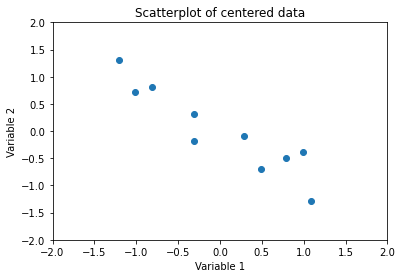

In [87]:
mu1 = np.mean(pca2d[:,0])
mu2 = np.mean(pca2d[:,1])
mu = np.array([mu1, mu2])

pca2d_centered = pca2d - mu
print(pca2d_centered)

plt.scatter(pca2d_centered[:,0], pca2d_centered[:,1])
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.title("Scatterplot of centered data")


## (b) PCs and Scatterplot of Data with PCs as basis

Text(0.5, 1.0, 'Scatterplot in PC basis')

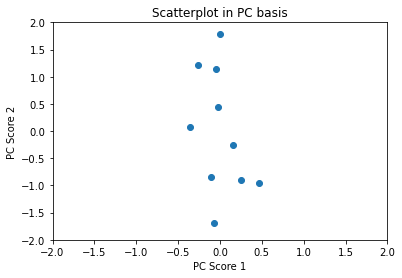

In [88]:
pca_cov = np.cov(pca2d_centered, rowvar=False)
#print(pca_cov)

res = np.linalg.eig(pca_cov)
eig = res[0]
PC = res[1]
PC1 = PC[0]
PC2 = PC[1]

x = np.dot(pca2d_centered, PC1) 
y = np.dot(pca2d_centered, PC2) 

plt.scatter(x, y)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel("PC Score 1")
plt.ylabel("PC Score 2")
plt.title("Scatterplot in PC basis")



## (c) PCs as compression

Text(0.5, 1.0, 'Reconstruction using only the 1st PC')

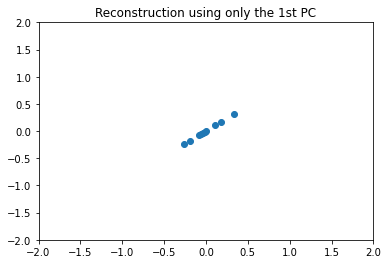

In [89]:
recon_PC1=np.repeat([PC1], 10,0)
recon_1 = list()

for i in range(10):
    recon_1.append(recon_PC1[i]*x[i])
#print(recon_1)

x_re = np.zeros(10)
y_re = np.zeros(10)
for i in range(10):
    x_re[i]=recon_1[i][0]
    y_re[i]=recon_1[i][1]
    
#np.append(recon_1, recon_PC1[1]*x[1])

plt.scatter(x_re, y_re)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title("Reconstruction using only the 1st PC")


Text(0.5, 1.0, 'Reconstruction using only the 2nd PC')

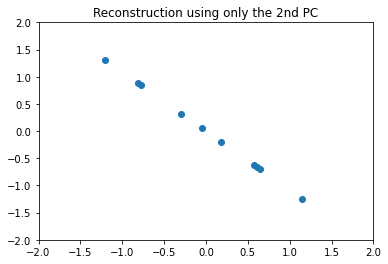

In [91]:
recon_PC2=np.repeat([PC2], 10,0)
recon_2 = list()

for i in range(10):
    recon_2.append(recon_PC2[i]*y[i])
#print(recon_1)

x_re2 = np.zeros(10)
y_re2 = np.zeros(10)
for i in range(10):
    x_re2[i]=recon_2[i][0]
    y_re2[i]=recon_2[i][1]
    
#np.append(recon_1, recon_PC1[1]*x[1])

plt.scatter(x_re2, y_re2)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title("Reconstruction using only the 2nd PC")


# 1.2 PCA- 3-dimensional Toy Data
## (a) Loading, Centering and Scatter Plot